## Ideas

- Cantidad de publicaciones de cada tipo
  - En total
  - Por año
- 

In [28]:
#importo las funciones para levantar los dataframes
%run "../../utils/dataset_parsing.ipynb"
#importo las funciones para graficar
%run "../../utils/graphs.ipynb"
df = levantar_datos("../../"+DATASET_RELATIVE_PATH)
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio', 'mes', 'ano', 'dia'],
      dtype='object')

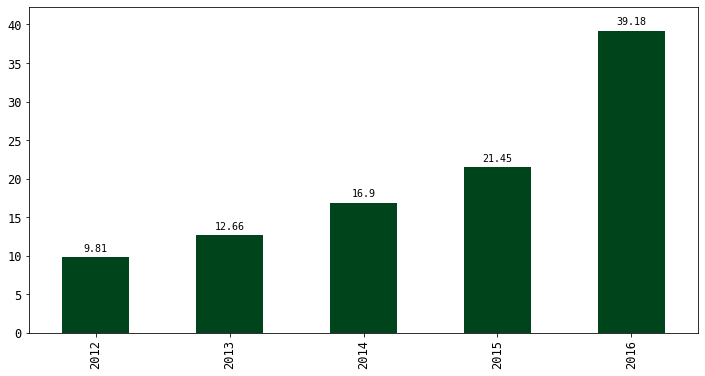

In [50]:
#Distribucion de las publicaciones por año
por_anio = df.groupby("ano").agg({"ano":"count"}).rename(columns={'ano':'cantidad'})
total_publicaciones = df.shape[0]
por_anio_porcentual = por_anio.apply(lambda x: round(100 * x/total_publicaciones, 2), axis=0)
#histograma de ditribucion por año
get_barplot(por_anio_porcentual.cantidad)

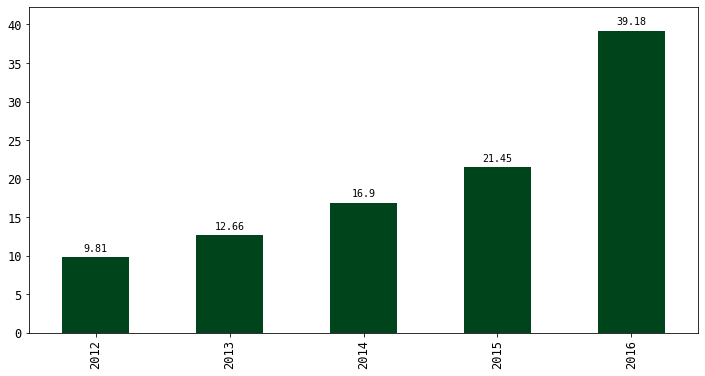

In [30]:
por_tipo = df.groupby(["tipodepropiedad"]).agg({"tipodepropiedad":"count"}).unstack(fill_value=0).sort_values(ascending=False)
por_tipo.index = por_tipo.index.droplevel()
total_publicaciones = por_tipo.sum()
por_tipo_porcentual = por_tipo.apply(lambda x: round(100 * x/total_publicaciones, 2))
por_tipo_porcentual


tipodepropiedad
Casa                             59.06
Apartamento                      23.90
Casa en condominio                8.04
Terreno                           4.14
Local Comercial                   1.27
Oficina comercial                 0.73
Bodega comercial                  0.59
Edificio                          0.58
Terreno comercial                 0.55
Casa uso de suelo                 0.30
Quinta Vacacional                 0.16
Duplex                            0.14
Villa                             0.14
Inmuebles productivos urbanos     0.08
Rancho                            0.07
Local en centro comercial         0.07
Departamento Compartido           0.06
Otros                             0.06
Nave industrial                   0.03
Terreno industrial                0.01
Huerta                            0.01
Lote                              0.00
Hospedaje                         0.00
Garage                            0.00
dtype: float64

In [31]:
por_tipo_porcentual.head(5).sum()

96.41

En base a los resultados de la tabla anterior, nos quedamos con los 5 tipos de propiedad más frecuentes en las publicaciones (96.41% del total) para poder sintetizar mejor los gráficos.

In [32]:
top_5_tipos  = por_tipo_porcentual.head(5).index.values
top_5_tipos

[Casa, Apartamento, Casa en condominio, Terreno, Local Comercial]
Categories (24, object): [Apartamento, Bodega comercial, Casa, Casa en condominio, ..., Terreno industrial, Villa, Hospedaje, Garage]

In [33]:
df_top_5 = df.loc[df["tipodepropiedad"].isin(top_5_tipos)]

In [34]:
por_tipo_ano = df_top_5.groupby(["ano","tipodepropiedad"]).agg({"tipodepropiedad":"count"}).unstack(fill_value=0)
por_tipo_ano.columns = por_tipo_ano.columns.droplevel()
por_tipo_ano

tipodepropiedad,Apartamento,Casa,Casa en condominio,Local Comercial,Terreno
ano,,,,,
2012,5071,13728,2835,109,951
2013,6716,19366,1960,328,1108
2014,9698,24299,3042,525,1540
2015,12780,29800,4095,718,2133
2016,23076,54524,7365,1375,4213


In [35]:
totales = por_tipo_ano.sum(axis=1)

In [36]:
# por_tipo_porcentual = por_tipo.apply(lambda x: x[totales], axis=1)
por_tipo_ano_porcentual = por_tipo_ano.apply(lambda x: round(100 * x/totales[x.index], 2), axis=0)

In [37]:
por_tipo_ano_porcentual

tipodepropiedad,Apartamento,Casa,Casa en condominio,Local Comercial,Terreno
ano,,,,,
2012,22.35,60.49,12.49,0.48,4.19
2013,22.78,65.70,6.65,1.11,3.76
2014,24.80,62.14,7.78,1.34,3.94
2015,25.80,60.17,8.27,1.45,4.31
2016,25.48,60.21,8.13,1.52,4.65


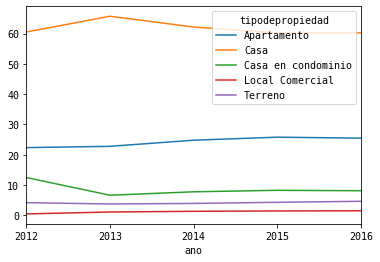

In [38]:
por_tipo_ano_porcentual.plot(kind='line', xticks=por_tipo_ano_porcentual.index.values)

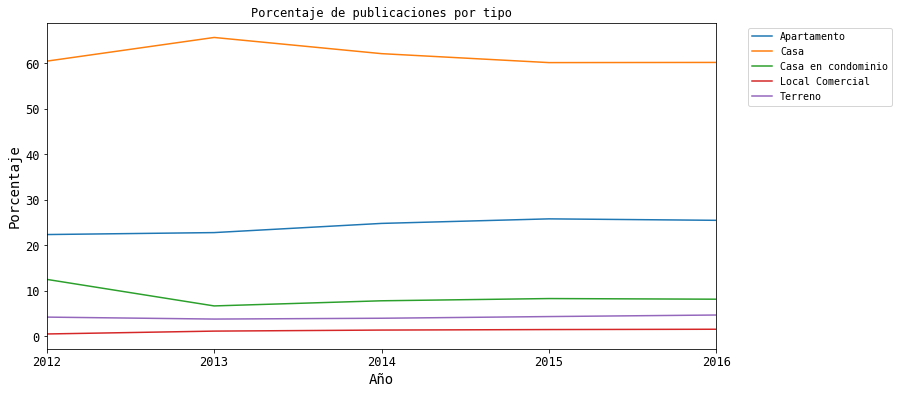

In [39]:
import matplotlib.pyplot as plt
def get_lineplot(data, xlabel="", ylabel="", **kwargs):
    plot = data.plot(figsize=(12,6), fontsize=12, **kwargs)
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    return plot
plot = get_lineplot(por_tipo_ano_porcentual, xticks=por_tipo_ano_porcentual.index.values, title = "Porcentaje de publicaciones por tipo", xlabel="Año", ylabel="Porcentaje")
